In [1]:
pip install tushare

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tushare as ts
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
ts.set_token('293d683e83b36fad82472d9a4b4c3903d21fa6bcb85cb0cd4f4b9414')
pro = ts.pro_api()
df = pro.daily(ts_code='000001.SZ', start_date='2010-01-01', end_date='2022-12-31')
print(df.head())

     ts_code trade_date   open   high    low  close  pre_close  change  \
0  000001.SZ   20211118  18.09  18.12  17.73  17.80      18.11   -0.31   
1  000001.SZ   20211117  18.15  18.30  17.98  18.11      18.22   -0.11   
2  000001.SZ   20211116  18.36  18.54  18.17  18.22      18.43   -0.21   
3  000001.SZ   20211115  18.35  18.63  18.20  18.43      18.27    0.16   
4  000001.SZ   20211112  18.31  18.63  18.11  18.27      18.35   -0.08   

   pct_chg        vol       amount  
0  -1.7118  799843.77  1430058.311  
1  -0.6037  664640.38  1203859.180  
2  -1.1394  601110.48  1099113.409  
3   0.8758  655089.99  1203764.095  
4  -0.4360  957546.46  1753072.716  


select desired features (uncomment accordingly)

In [4]:
x = df
y = x.close
x = x.drop(['close'],axis=1)
x = x[['open','change','vol']]
#x = x[['open','change']]
#x = x['open']
x = torch.from_numpy(np.asarray(x).astype(np.float32))
y = torch.from_numpy(np.asarray(y).astype(np.float32))
x_train = x[:2000]
y_train = y[:2000]
x_test = x[2000:]
y_test = y[2000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

mean= x_train.mean()
std= x_train.std()
print(mean)
print(std)

torch.Size([2000, 3])
torch.Size([2000])
torch.Size([816, 3])
torch.Size([816])
tensor(334909.2188)
tensor(623147.3750)


In [5]:
device= torch.device("cpu")
print(device)

cpu


class and training implementation for feature - open,change,val

In [6]:
class MLPRegression2_a(nn.Module):
    def __init__(self, dim=1024):
        super(MLPRegression2_a,self).__init__()
        self.hidden1 = nn.Sequential(
                        nn.Linear(x.shape[1], dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
         
         
        self.hidden2 = nn.Sequential(
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
        
        self.hidden3 = nn.Sequential(
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
   
        self.predict=nn.Linear(dim,1)
        
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        output=self.predict(x)
        return output[:,0]
'''
net2 = MLPRegression2_a()
batch_size = 100
lr = 0.01
net2 = net2.to(device)

criterion = nn.MSELoss()

for epoch in range(1,100):
    
    if epoch%7 == 0:
        lr = lr / 1.5
        
    optimizer = torch.optim.SGD(net2.parameters(), lr=lr) 
    temp_loss=0
    num =0
        
    random =torch.randperm(2000)
    
    for count in range(0,2000,batch_size):
        optimizer.zero_grad() 
        indices=random[count:count+batch_size]
       
        data =  x_train[indices].to(device)
        data = (data-mean)/std

        label= y_train[indices].to(device)
        
        
   
        inputs=data.view(batch_size,3)
       

        inputs.requires_grad_()
        predict=net2(inputs)


        loss = criterion(predict, label)  

        loss.backward()
        optimizer.step()
        
        temp_loss += loss.detach().item()
        
        num +=1  
        
    if epoch % 2 == 1:
            torch.save(net2.state_dict(), f'./{epoch}open_change_val.pth')
    total_loss = temp_loss/num
    print(f"Epoch: {epoch} Learning rate: {lr} Total Loss: {total_loss}")
'''

'\nnet2 = MLPRegression2_a()\nbatch_size = 100\nlr = 0.01\nnet2 = net2.to(device)\n\ncriterion = nn.MSELoss()\n\nfor epoch in range(1,100):\n    \n    if epoch%7 == 0:\n        lr = lr / 1.5\n        \n    optimizer = torch.optim.SGD(net2.parameters(), lr=lr) \n    temp_loss=0\n    num =0\n        \n    random =torch.randperm(2000)\n    \n    for count in range(0,2000,batch_size):\n        optimizer.zero_grad() \n        indices=random[count:count+batch_size]\n       \n        data =  x_train[indices].to(device)\n        data = (data-mean)/std\n\n        label= y_train[indices].to(device)\n        \n        \n   \n        inputs=data.view(batch_size,3)\n       \n\n        inputs.requires_grad_()\n        predict=net2(inputs)\n\n\n        loss = criterion(predict, label)  \n\n        loss.backward()\n        optimizer.step()\n        \n        temp_loss += loss.detach().item()\n        \n        num +=1  \n        \n    if epoch % 2 == 1:\n            torch.save(net2.state_dict(), f\'./

class and training implementation for feature - open and change (uncomment accordingly)

In [7]:
class MLPRegression2_b(nn.Module):
    def __init__(self, dim=1024):
        super(MLPRegression2_b,self).__init__()
        self.hidden1 = nn.Sequential(
                        nn.Linear(x.shape[1], dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
         
         
        self.hidden2 = nn.Sequential(
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
        
        self.hidden3 = nn.Sequential(
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
   
        self.predict=nn.Linear(dim,1)
        
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        output=self.predict(x)
        return output[:,0]
    
'''net2 = MLPRegression2_b()
batch_size = 100
lr = 0.01
net2 = net2.to(device)

criterion = nn.MSELoss()

for epoch in range(1,100):
    
    if epoch%7 == 0:
        lr = lr / 1.5
        
    optimizer = torch.optim.SGD(net2.parameters(), lr=lr) 
    temp_loss=0
    num =0
        
    random =torch.randperm(2000)
    
    for count in range(0,2000,batch_size):
        optimizer.zero_grad() 
        indices=random[count:count+batch_size]
       
        data =  x_train[indices].to(device)
        data = (data-mean)/std

        label= y_train[indices].to(device)
        
        
   
        inputs=data.view(batch_size,2)
       

        inputs.requires_grad_()
        predict=net2(inputs)


        loss = criterion(predict, label)  

        loss.backward()
        optimizer.step()
        
        temp_loss += loss.detach().item()
        
        num +=1  
        
    if epoch % 2 == 1:
            torch.save(net2.state_dict(), f'./{epoch}open_change.pth')
    total_loss = temp_loss/num
    print(f"Epoch: {epoch} Learning rate: {lr} Total Loss: {total_loss}")
'''

'net2 = MLPRegression2_b()\nbatch_size = 100\nlr = 0.01\nnet2 = net2.to(device)\n\ncriterion = nn.MSELoss()\n\nfor epoch in range(1,100):\n    \n    if epoch%7 == 0:\n        lr = lr / 1.5\n        \n    optimizer = torch.optim.SGD(net2.parameters(), lr=lr) \n    temp_loss=0\n    num =0\n        \n    random =torch.randperm(2000)\n    \n    for count in range(0,2000,batch_size):\n        optimizer.zero_grad() \n        indices=random[count:count+batch_size]\n       \n        data =  x_train[indices].to(device)\n        data = (data-mean)/std\n\n        label= y_train[indices].to(device)\n        \n        \n   \n        inputs=data.view(batch_size,2)\n       \n\n        inputs.requires_grad_()\n        predict=net2(inputs)\n\n\n        loss = criterion(predict, label)  \n\n        loss.backward()\n        optimizer.step()\n        \n        temp_loss += loss.detach().item()\n        \n        num +=1  \n        \n    if epoch % 2 == 1:\n            torch.save(net2.state_dict(), f\'./{e

class and training implementation of feature open (uncomment accordingly)

In [8]:
class MLPRegression2_c(nn.Module):
    def __init__(self, dim=1024):
        super(MLPRegression2_c,self).__init__()
        self.hidden1 = nn.Sequential(
                        nn.Linear(1, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
         
         
        self.hidden2 = nn.Sequential(
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
        
        self.hidden3 = nn.Sequential(
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.Linear(dim, dim),
                        nn.BatchNorm1d(dim),
                        nn.ReLU(inplace=True),
                        nn.Dropout(0.2),
                        )
   
        self.predict=nn.Linear(dim,1)
        
        
    def forward(self,x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        output=self.predict(x)
        return output[:,0]
    
'''net2 = MLPRegression2_c()
batch_size = 100
lr = 0.01
net2 = net2.to(device)

criterion = nn.MSELoss()

for epoch in range(1,100):
    
    if epoch%7 == 0:
        lr = lr / 1.5
        
    optimizer = torch.optim.SGD(net2.parameters(), lr=lr) 
    temp_loss=0
    num =0
        
    random =torch.randperm(2000)
    
    for count in range(0,2000,batch_size):
        optimizer.zero_grad() 
        indices=random[count:count+batch_size]
       
        data =  x_train[indices].to(device)
        #data = (data-mean)/std

        label= y_train[indices].to(device)
        
        
   
        inputs=data.view(batch_size,1)
       

        inputs.requires_grad_()
        predict=net2(inputs)


        loss = criterion(predict, label)  

        loss.backward()
        optimizer.step()
        
        temp_loss += loss.detach().item()
        
        num +=1  
        
    if epoch % 2 == 1:
            torch.save(net2.state_dict(), f'./{epoch}open.pth')
    total_loss = temp_loss/num
    print(f"Epoch: {epoch} Learning rate: {lr} Total Loss: {total_loss}")
'''

'net2 = MLPRegression2_c()\nbatch_size = 100\nlr = 0.01\nnet2 = net2.to(device)\n\ncriterion = nn.MSELoss()\n\nfor epoch in range(1,100):\n    \n    if epoch%7 == 0:\n        lr = lr / 1.5\n        \n    optimizer = torch.optim.SGD(net2.parameters(), lr=lr) \n    temp_loss=0\n    num =0\n        \n    random =torch.randperm(2000)\n    \n    for count in range(0,2000,batch_size):\n        optimizer.zero_grad() \n        indices=random[count:count+batch_size]\n       \n        data =  x_train[indices].to(device)\n        #data = (data-mean)/std\n\n        label= y_train[indices].to(device)\n        \n        \n   \n        inputs=data.view(batch_size,1)\n       \n\n        inputs.requires_grad_()\n        predict=net2(inputs)\n\n\n        loss = criterion(predict, label)  \n\n        loss.backward()\n        optimizer.step()\n        \n        temp_loss += loss.detach().item()\n        \n        num +=1  \n        \n    if epoch % 2 == 1:\n            torch.save(net2.state_dict(), f\'./{

show result of feature open,change and val

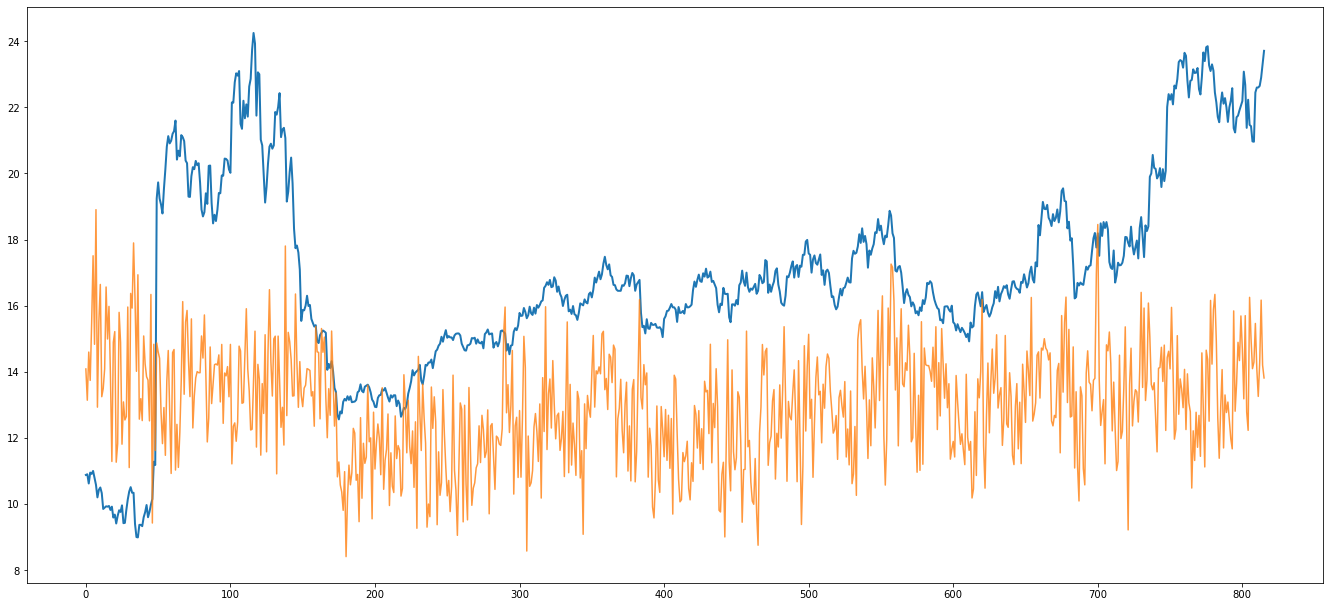

In [9]:
net2 = MLPRegression2_a()
net2.load_state_dict(torch.load('./open_change_vol.pth',map_location=torch.device('cpu')))
temp = x_test.squeeze()
temp = temp.view(x_test.shape[0],3)

predicted = net2(temp.to(device))

plt.axes([0,0,3,2])
plt.plot(y_test,linewidth=2)
plt.plot(predicted.detach().numpy(),alpha=0.8)

show results of feature open and change

In [10]:
x = df
y = x.close
x = x.drop(['close'],axis=1)
x = x[['open','change']]
x = torch.from_numpy(np.asarray(x).astype(np.float32))
y = torch.from_numpy(np.asarray(y).astype(np.float32))
x_train = x[:2000]
y_train = y[:2000]
x_test = x[2000:]
y_test = y[2000:]

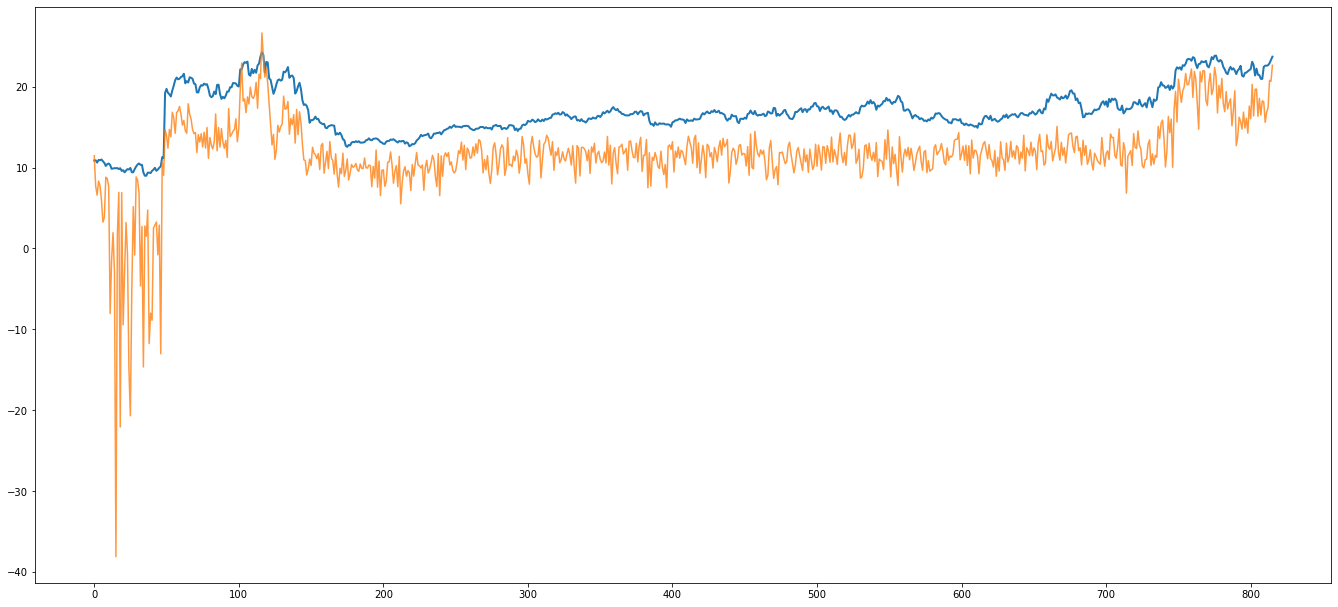

In [11]:
net2 = MLPRegression2_b()
net2.load_state_dict(torch.load('./open_change.pth',map_location=torch.device('cpu')))
temp = x_test.squeeze()
temp = temp.view(x_test.shape[0],2)

predicted = net2(temp.to(device))

plt.axes([0,0,3,2])
plt.plot(y_test,linewidth=2)
plt.plot(predicted.detach().numpy(),alpha=0.8)

show result of open

In [12]:
x = df
y = x.close
x = x.drop(['close'],axis=1)
x = x[['open']]
x = torch.from_numpy(np.asarray(x).astype(np.float32))
y = torch.from_numpy(np.asarray(y).astype(np.float32))
x_train = x[:2000]
y_train = y[:2000]
x_test = x[2000:]
y_test = y[2000:]

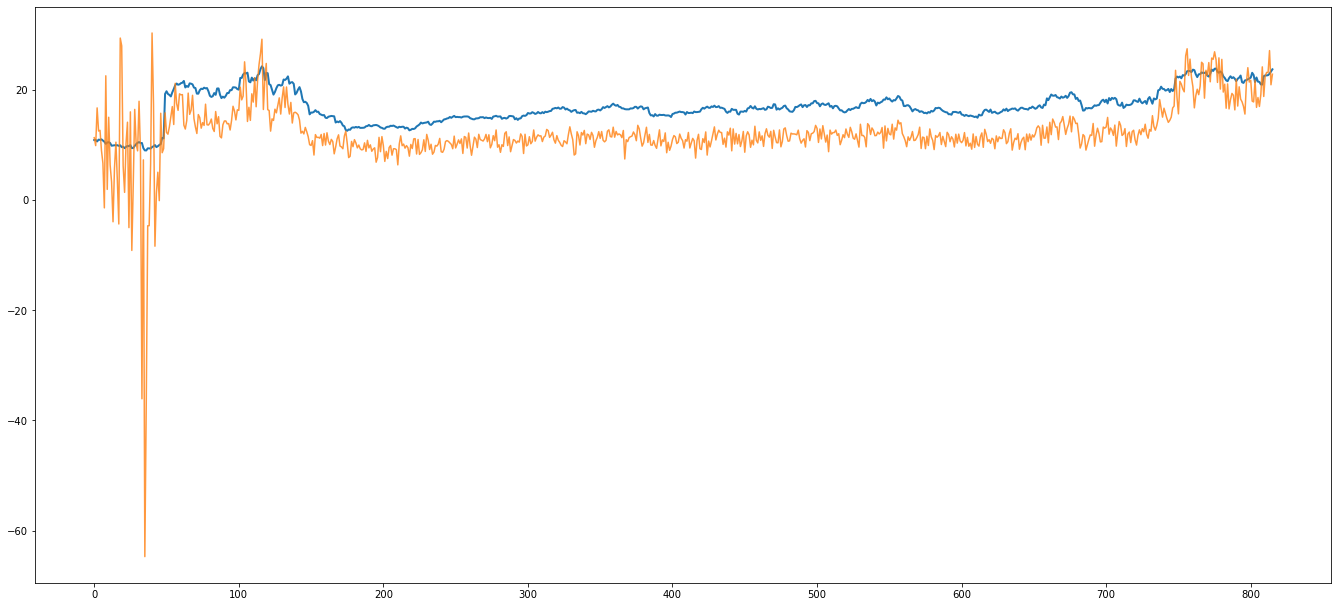

In [13]:
net2 = MLPRegression2_c()
net2.load_state_dict(torch.load('./open.pth',map_location=torch.device('cpu')))
temp = x_test.squeeze()
temp = temp.view(x_test.shape[0],1)

predicted = net2(temp.to(device))

plt.axes([0,0,3,2])
plt.plot(y_test,linewidth=2)
plt.plot(predicted.detach().numpy(),alpha=0.8)